# Effective self diffusivity

By measuring the time for the covariance to reach a linear regime, we can estimate a time span where the dispersion simulation will be sufficiently long enough to reach the advection linear regime. This means that we measure the number of steps to get a sufficiently flat version of $M(t)/t$.

In [1]:
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
path_to_data = 'data/self_diffusivity_results_validation'
num_samples=8
Ms = np.zeros((num_samples,int(100*128**2),2,2))
for i in range(num_samples):
    M = np.load(os.path.join(path_to_data,f'simulation_result_{i}.npz'))
    Ms[i] = M['Mx']
    My = M['My']


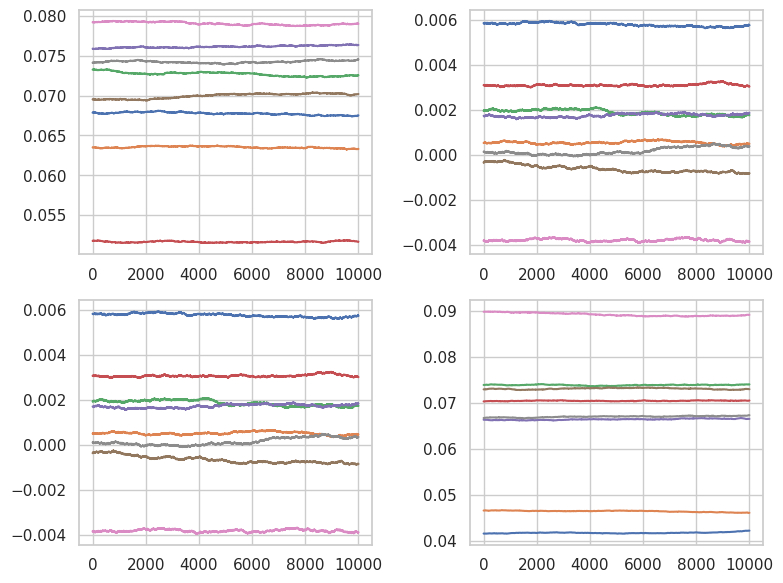

In [8]:
sns.set_theme(style="whitegrid")
fig,ax = plt.subplots(2,2,figsize=(8,6))

D_m=1
L = 128
t = L**2/D_m
dt = 0.01
t_ = np.arange(Ms.shape[1])
start = -int(1e4)
for m in range(num_samples):
    ax[0,0].plot(Ms[m,start:,0,0]/(2*t_[start:]))
    ax[0,1].plot(Ms[m,start:,0,1]/(2*t_[start:]))
    ax[1,0].plot(Ms[m,start:,1,0]/(2*t_[start:]))
    ax[1,1].plot(Ms[m,start:,1,1]/(2*t_[start:]))

# for a in ax.flatten():
#     a.axvline(t*10, color='r', linestyle='--', label=r'$t=L^2/D_m$')
#     a.axvline(t*100, color='g', linestyle='--', label=r'$10\cdot t$')
#     a.legend()
#     a.set_xscale('log')

plt.tight_layout()
plt.show()

In [4]:
# path_to_data = 'data/self_diffusivity_results_train'
# media_metrics = 'data/media_samples_train'
# num_samples=50
# Ds = np.zeros((num_samples,2,2))
# imgs = np.load(os.path.join(media_metrics,'media_samples.npz'))
# porosities = np.zeros((num_samples))
# Ks = np.zeros((num_samples,2,2))
# t_ = np.arange(int(1e6))*1e-3

# for i in range(num_samples):
#     M = np.load(os.path.join(path_to_data,f'simulation_result_{i}.npz'))
#     porosities[i] = np.mean(~imgs['filled_images'][i])
#     Ks[i] = np.load(f'data/lbm_simulation_results_train/simulation_result_{i}.npz')['K']
#     Ds[i,0,0] = np.mean(M['Mx'][-1000:,0,0]/(2*t_[-1000:]),axis=0)
#     Ds[i,0,1] = np.mean(M['Mx'][-1000:,0,1]/(2*t_[-1000:]),axis=0)
#     Ds[i,1,0] = np.mean(M['Mx'][-1000:,1,0]/(2*t_[-1000:]),axis=0)
#     Ds[i,1,1] = np.mean(M['Mx'][-1000:,1,1]/(2*t_[-1000:]),axis=0)
# print(Ds.shape)

In [5]:
# sns.set_theme(style="whitegrid")
# fig,ax = plt.subplots(2,4,figsize=(12,6))
# # t_ = np.arange(Ms.shape[1])*1e-3
# # start = int(1)
# for m in range(num_samples):
#     ax[0,0].plot(Ks[:,0,0],Ds[:,0,0],'o',c='b')
#     ax[0,1].plot(Ks[:,0,1],Ds[:,0,1],'o',c='b')
#     ax[1,0].plot(Ks[:,1,0],Ds[:,1,0],'o',c='b')
#     ax[1,1].plot(Ks[:,1,1],Ds[:,1,1],'o',c='b')
#     ax[0,2].plot(porosities[:],Ds[:,0,0],'o',c='r')
#     ax[0,3].plot(porosities[:],Ds[:,0,1],'o',c='r')
#     ax[1,2].plot(porosities[:],Ds[:,1,0],'o',c='r')
#     ax[1,3].plot(porosities[:],Ds[:,1,1],'o',c='r')

# # for a in ax.flatten():
# #     a.set_xscale('log')

# plt.tight_layout()
# plt.show()